## Comparing Different Machine Learning Classification Algorithms:
### Are borrowers likely to repay their loans?

Using 2007 data from Lending Tree, an online, peer-to-peer investor/debtor marketplace, to classify loan applications by how likely the borrower is to repay the full amount of their obligation.

In [1]:
import pandas as pd
import numpy as np
loans_2007 = pd.read_csv('loans_2007.csv')
print(loans_2007.iloc[0][:8])
print(loans_2007.shape)

id                    1077501
member_id          1.2966e+06
loan_amnt                5000
funded_amnt              5000
funded_amnt_inv          4975
term                36 months
int_rate               10.65%
installment            162.87
Name: 0, dtype: object
(42538, 52)


C:\Users\isaac\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from tabulate import tabulate
from IPython.display import Image

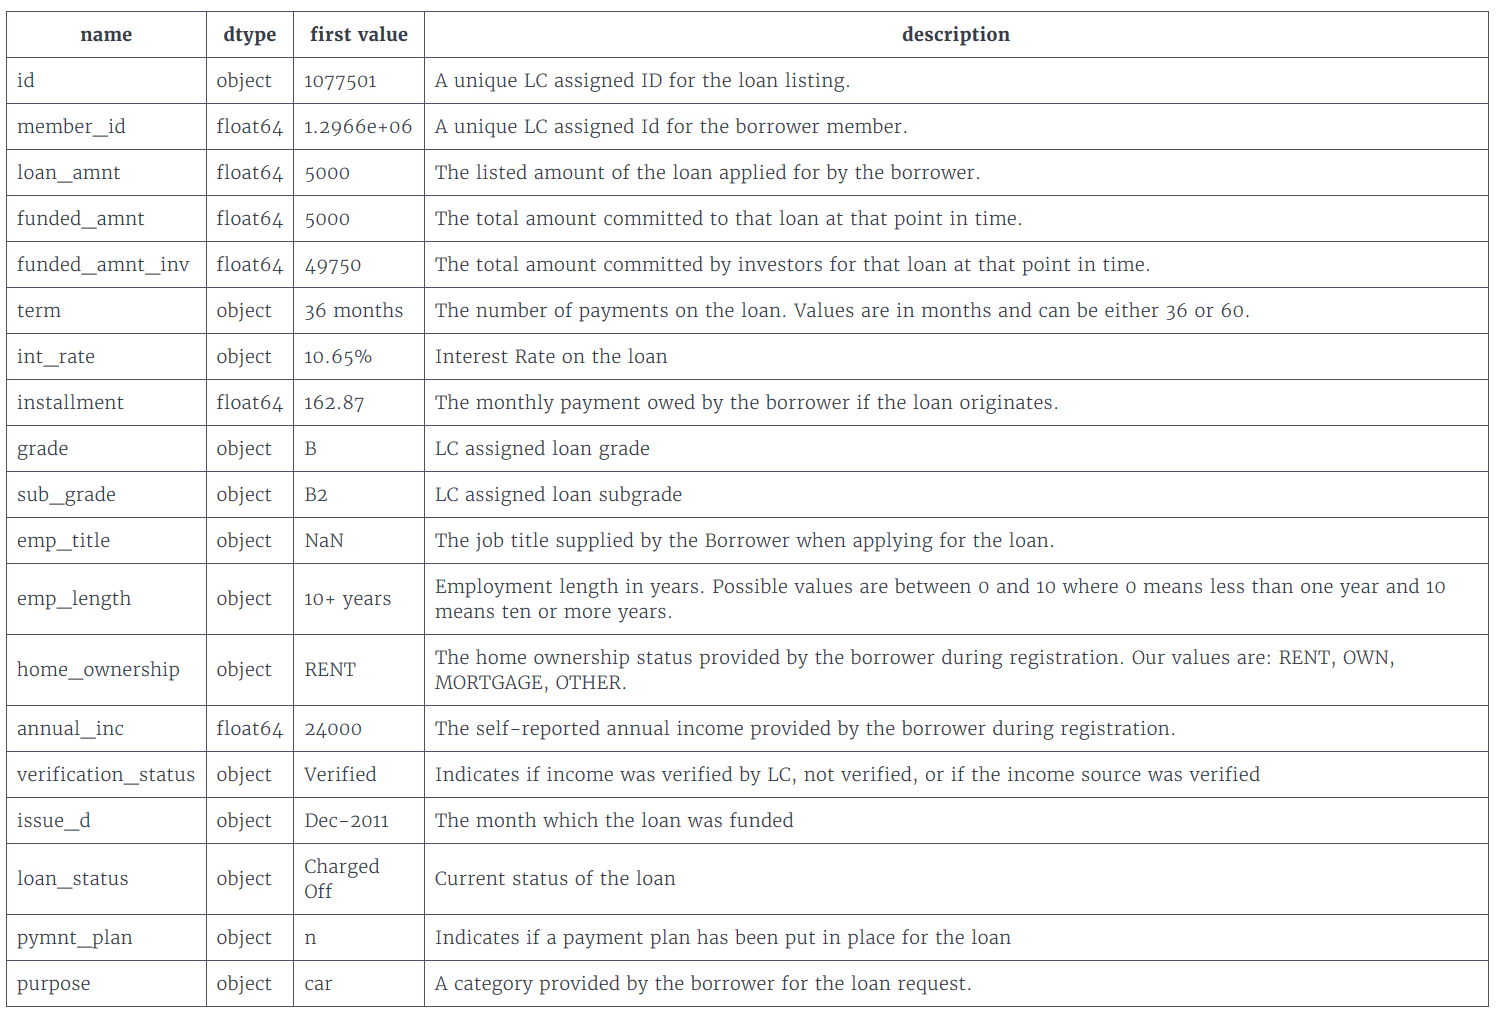

In [3]:
col_list = list(loans_2007.columns)
col_dict = {'col1':col_list[0:18], 'col2':col_list[18:36], 'col3':col_list[36:]}

Image("cols_1.png")

In [4]:
lost_columns = ['id','member_id','funded_amnt','funded_amnt_inv', 'grade','sub_grade',
                'emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt',
                'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
cut_columns = loans_2007[lost_columns]
loans_2007.drop(columns=['id','member_id','funded_amnt','funded_amnt_inv',
                         'grade','sub_grade','emp_title','issue_d'], inplace=True, errors='ignore')


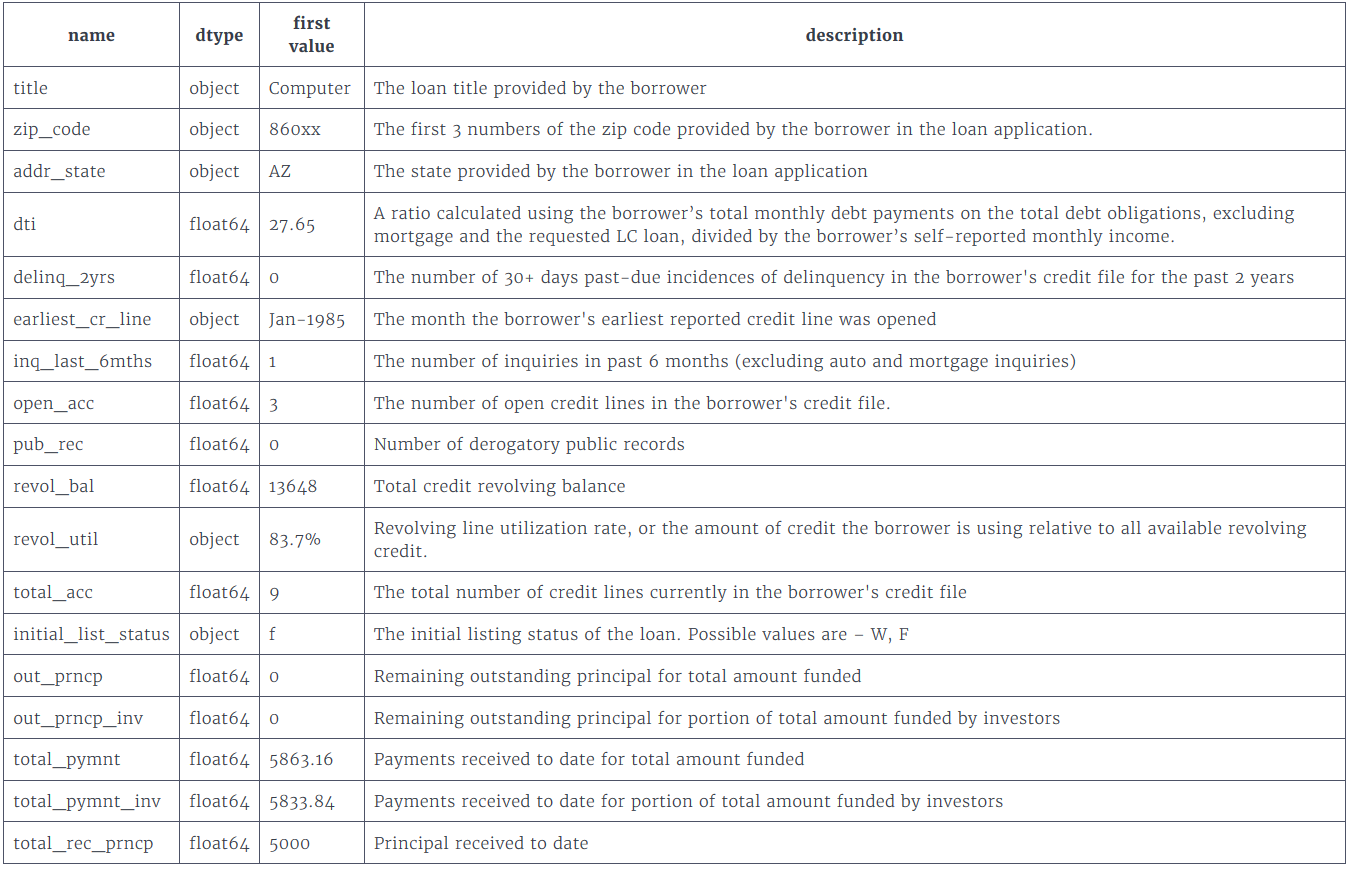

In [5]:
Image("cols_2.png")


In [6]:
## 7. Second group of features ##

loans_2007.drop(columns=['zip_code','out_prncp','out_prncp_inv','total_pymnt',
                         'total_pymnt_inv','total_rec_prncp'], inplace=True, errors='ignore')

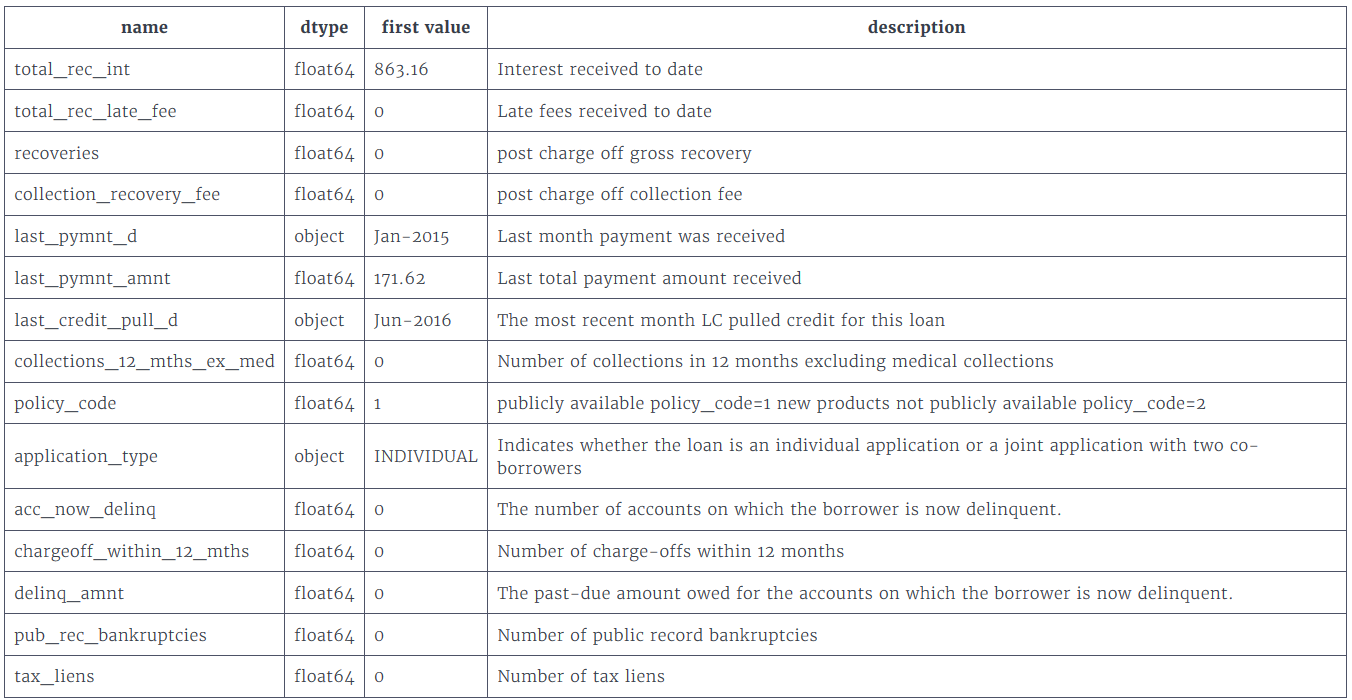

In [7]:
Image("cols_3.png")

In [8]:
cut_columns

,id,member_id,funded_amnt,funded_amnt_inv,grade,sub_grade,emp_title,issue_d,zip_code,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599.0,5000.0,4975.0,B,B2,NaN,Dec-11,860xx,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62
1,1077430,1314167.0,2500.0,2500.0,C,C4,Ryder,Dec-11,309xx,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66
2,1077175,1313524.0,2400.0,2400.0,C,C5,NaN,Dec-11,606xx,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91
3,1076863,1277178.0,10000.0,10000.0,C,C1,AIR RESOURCES BOARD,Dec-11,917xx,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48
4,1075358,1311748.0,3000.0,3000.0,B,B5,University Medical Group,Dec-11,972xx,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,225.0,B,B3,NaN,Jun-07,100xx,0.00,0.00,2904.498829,258.82,2525.00,379.50,0.00,0.00,0.00,Jun-10,82.03
42534,71623,70735.0,6500.0,0.0,A,A5,NaN,Jun-07,100xx,0.00,0.00,7373.904962,0.00,6500.00,873.90,0.00,0.00,0.00,Jun-10,205.32
42535,70686,70681.0,5000.0,0.0,A,A3,Homemaker,Jun-07,068xx,0.00,0.00,5619.762090,0.00,5000.00,619.76,0.00,0.00,0.00,Jun-10,156.39
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## 9. Third group of features ##

loans_2007.drop(columns=['total_rec_int','total_rec_late_fee','recoveries',
                         'collection_recovery_fee','last_pymnt_d',
                         'last_pymnt_amnt'], inplace=True, errors='ignore')
print(loans_2007.columns)
loans_2007.head()

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Sep-13,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Jun-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [10]:
## 10. Target column ##

loans_2007['loan_status'].value_counts()

## 12. Binary classification ##

filt = (loans_2007['loan_status'] == 'Fully Paid') | (loans_2007['loan_status'] == 
                                                      'Charged Off')

loans_2007 = loans_2007[filt]
loans_2007.replace({'loan_status': {'Fully Paid':1, 'Charged Off':0}}, inplace=True)
#To include the same observations in cut_columns we need their indexes from 1oans_2007
obs_index = loans_2007.index
cut_columns_clean = cut_columns.iloc[obs_index]


## Cleaning Dates:

In [11]:
import datetime as dt

loan_return = cut_columns_clean[['total_pymnt', 'funded_amnt','issue_d', 'last_pymnt_d']].copy()
loan_return['return'] = (loan_return['total_pymnt'] - loan_return['funded_amnt'])/loan_return['funded_amnt']

loan_return['issue_d'].unique()
month_map = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}
year_map = {yr:'20'+str(yr) for yr in ['07','08','09','10','11','12','13','14','15','16','17']}

In [12]:
def date_clean(Series):
    Series = Series.dropna()
    split_list = Series.str.split('-', expand=True)
    
    split_list[0] = split_list[0].map(month_map)
    split_list[1] = split_list[1].map(year_map)
    
    merge = split_list.apply(lambda row: "{}/{}".format(row[0], row[1]), axis=1)
    dtformat = pd.to_datetime(merge)
#     drop_day = dtformat.apply(lambda x: x.strftime('%m/%Y'))
    return dtformat

In [13]:
loan_return['issue_d'] = date_clean(loan_return['issue_d'])
loan_return['last_pymnt_d'] = date_clean(loan_return['last_pymnt_d'])

In [14]:
loan_return

,total_pymnt,funded_amnt,issue_d,last_pymnt_d,return
0,5863.155187,5000.0,2011-12-01,2015-01-01,0.172631
1,1008.710000,2500.0,2011-12-01,2013-04-01,-0.596516
2,3005.666844,2400.0,2011-12-01,2014-06-01,0.252361
3,12231.890000,10000.0,2011-12-01,2015-01-01,0.223189
5,5632.210000,5000.0,2011-12-01,2015-01-01,0.126442
...,...,...,...,...,...
39781,2822.969293,2500.0,2007-07-01,2010-07-01,0.129188
39782,9913.491822,8500.0,2007-07-01,2010-07-01,0.166293
39783,5272.161128,5000.0,2007-07-01,2008-04-01,0.054432
39784,5174.198551,5000.0,2007-07-01,2008-01-01,0.034840


In [15]:
loan_return['outstanding'] = (loan_return['last_pymnt_d'] - loan_return['issue_d'])
loan_return['outstanding'] = loan_return['outstanding'].apply(lambda x: np.round(x/dt.timedelta(days=30)))

In [16]:
loan_return

,total_pymnt,funded_amnt,issue_d,last_pymnt_d,return,outstanding
0,5863.155187,5000.0,2011-12-01,2015-01-01,0.172631,38.0
1,1008.710000,2500.0,2011-12-01,2013-04-01,-0.596516,16.0
2,3005.666844,2400.0,2011-12-01,2014-06-01,0.252361,30.0
3,12231.890000,10000.0,2011-12-01,2015-01-01,0.223189,38.0
5,5632.210000,5000.0,2011-12-01,2015-01-01,0.126442,38.0
...,...,...,...,...,...,...
39781,2822.969293,2500.0,2007-07-01,2010-07-01,0.129188,37.0
39782,9913.491822,8500.0,2007-07-01,2010-07-01,0.166293,37.0
39783,5272.161128,5000.0,2007-07-01,2008-04-01,0.054432,9.0
39784,5174.198551,5000.0,2007-07-01,2008-01-01,0.034840,6.0


In [17]:
## 13. Removing single value columns ##

drop_columns = []

for col in loans_2007.columns:
    non_null = loans_2007[col].dropna()
    col_unique = non_null.unique()
    num_unique = len(col_unique)
    if num_unique == 1:
        drop_columns.append(col)

loans_2007.drop(columns=drop_columns, inplace=True)
loans_2007.to_csv('filtered_loans_2007.csv')

## Part 2:

In [18]:
loans = pd.read_csv('filtered_loans_2007.csv')
null_counts = loans.isnull().sum()
print(null_counts[null_counts > 0])                           

emp_length              1036
title                     11
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [19]:
## 2. Handling missing values ##

loans.drop(columns=['pub_rec_bankruptcies'], inplace=True)
loans.dropna(inplace=True)
print(loans.dtypes.value_counts())

object     11
float64    10
int64       2
dtype: int64


In [20]:
object_columns_df = loans.select_dtypes(include='object')
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line            Jan-85
revol_util                  83.70%
last_credit_pull_d          Jun-16
Name: 0, dtype: object


In [21]:
# cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']

# for col in cols:
#     print(loans[col].unique())
#     print('\n')


In [22]:
print(loans['title'].value_counts())
print(loans['purpose'].value_counts())

Debt Consolidation                  2068
Debt Consolidation Loan             1599
Personal Loan                        624
Consolidation                        488
debt consolidation                   466
                                    ... 
New Heating and A/C System             1
Moving Up Ladder                       1
interest rates are too damn high       1
 Credit card payoff                    1
jetta                                  1
Name: title, Length: 18873, dtype: int64
debt_consolidation    17751
credit_card            4911
other                  3711
home_improvement       2808
major_purchase         2083
small_business         1719
car                    1459
wedding                 916
medical                 655
moving                  552
house                   356
vacation                348
educational             312
renewable_energy         94
Name: purpose, dtype: int64


In [23]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}

loans.drop(columns=['last_credit_pull_d','addr_state','title','earliest_cr_line'],
           inplace=True)
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')

loans.replace(mapping_dict, inplace=True)

In [24]:
dummies = pd.get_dummies(loans[['home_ownership','verification_status','purpose','term']])

loans = pd.concat([loans, dummies], axis=1)
loans.drop(columns=['home_ownership','verification_status','purpose','term'], inplace=True)

loans.to_csv('cleaned_loans_2007.csv')

Now moving onto model building:
We'll begin with logistical classification and then compare the results with a random forest classifier.
First let's create a function which computes the true positive and false positive rates to easily compare mnodel errors.

In [25]:
loan_return

,total_pymnt,funded_amnt,issue_d,last_pymnt_d,return,outstanding
0,5863.155187,5000.0,2011-12-01,2015-01-01,0.172631,38.0
1,1008.710000,2500.0,2011-12-01,2013-04-01,-0.596516,16.0
2,3005.666844,2400.0,2011-12-01,2014-06-01,0.252361,30.0
3,12231.890000,10000.0,2011-12-01,2015-01-01,0.223189,38.0
5,5632.210000,5000.0,2011-12-01,2015-01-01,0.126442,38.0
...,...,...,...,...,...,...
39781,2822.969293,2500.0,2007-07-01,2010-07-01,0.129188,37.0
39782,9913.491822,8500.0,2007-07-01,2010-07-01,0.166293,37.0
39783,5272.161128,5000.0,2007-07-01,2008-04-01,0.054432,9.0
39784,5174.198551,5000.0,2007-07-01,2008-01-01,0.034840,6.0


## Error Metrics
### Writing a function to format and print model evaluations

In [26]:
def positive_rate(predictions, target, output='show'):
    tp = sum((predictions == 1) & (target == 1))
    fp = sum((predictions == 1) & (target == 0))
    tn = sum((predictions == 0) & (target == 0))
    fn = sum((predictions == 0) & (target == 1))

    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    
    
    
    #Including the return on your investment
    
    pred_invest = predictions[predictions == 1].index
    mod_return = loan_return.iloc[pred_invest, 0:2]
    sum_funded = sum(mod_return['funded_amnt'])
    sum_returned = sum(mod_return['total_pymnt'])
    ret = (sum_returned - sum_funded)/sum_funded
    
    
    #The actual return for investors, return to entire test table. Designed as placebo reference
    
    plac_funded = sum(loan_return.iloc[predictions.index]['funded_amnt'])
    plac_returned = sum(loan_return.iloc[predictions.index]['total_pymnt'])
    plac_ret = (plac_returned - plac_funded)/plac_funded
    
    if output == 'show':
        print('True Positive Rate:\t{:.4}'.format(tpr))
        print('False Positive Rate:\t{:.4}'.format(fpr))
        print('Model Results:')
        print('Invested:\t${:.2f}\nReturn:\t\t${:.2f}\nPercent:\t{:.4f}%'.format(sum_funded, sum_returned, ret*100))
        print('No-Model Results:')
        print('Invested:\t${:.2f}\nReturn:\t\t${:.2f}\nPercent:\t{:.4f}%'.format(plac_funded, plac_returned, plac_ret*100))
    
    utility = (ret - plac_ret)/plac_ret
    pymnt_months = loan_return.iloc[pred_invest]['outstanding']
    average_pymnt_months = np.mean(pymnt_months)
    
    payload = {'utility':utility, 'average_pymnt_months':average_pymnt_months, 'tpr':tpr, 'fpr':fpr,
              'model_invested':sum_funded, 'raw_invested':plac_funded, 'model_return':ret, 'raw_return':plac_ret}
    return payload

In [27]:
loans = pd.read_csv('cleaned_loans_2007.csv')
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37675 entries, 0 to 37674
Data columns (total 40 columns):
Unnamed: 0                             37675 non-null int64
Unnamed: 0.1                           37675 non-null int64
loan_amnt                              37675 non-null float64
int_rate                               37675 non-null float64
installment                            37675 non-null float64
emp_length                             37675 non-null int64
annual_inc                             37675 non-null float64
loan_status                            37675 non-null int64
dti                                    37675 non-null float64
delinq_2yrs                            37675 non-null float64
inq_last_6mths                         37675 non-null float64
open_acc                               37675 non-null float64
pub_rec                                37675 non-null float64
revol_bal                              37675 non-null float64
revol_util                     

In [28]:
# Predict that all loans will be paid off on time.

predictions = pd.Series(np.ones(loans.shape[0]))

fp = len((loans['loan_status'] == 0))
fpr = fp/fp

tp = len((loans['loan_status'] == 1))
tpr = tp/tp

print(fpr, tpr)

1.0 1.0


In [29]:
## 6. Logistic Regression ##

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
features = loans.drop(columns='loan_status')
target = loans['loan_status']
lr.fit(features, target)
predictions = lr.predict(features)
predictions = pd.Series(predictions)

catch = positive_rate(predictions, target)

True Positive Rate:	0.9985
False Positive Rate:	0.9961
Model Results:
Invested:	$408104475.00
Return:		$450624945.10
Percent:	10.4190%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


In [30]:
catch

{'utility': 0.00018703246377526736,
 'average_pymnt_months': 29.010070869078703,
 'tpr': 0.9984823143158025,
 'fpr': 0.9961031731304509,
 'model_invested': 408104475.0,
 'raw_invested': 408944900.0,
 'model_return': 0.10419015890837463,
 'raw_return': 0.10417067561026211}

In [31]:
## 7. Cross Validation ##

from sklearn.model_selection import cross_val_predict
lr = LogisticRegression(solver='liblinear')
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

positive_rate(predictions, target)

True Positive Rate:	0.9237
False Positive Rate:	0.8668
Model Results:
Invested:	$369709375.00
Return:		$408863213.98
Percent:	10.5904%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


{'utility': 0.01664283950608775,
 'average_pymnt_months': 29.152331154684095,
 'tpr': 0.923713064486155,
 'fpr': 0.8667656336982743,
 'model_invested': 369709375.0,
 'raw_invested': 408944900.0,
 'model_return': 0.10590437144568443,
 'raw_return': 0.10417067561026211}

In [32]:
## 9. Penalizing the classifier ##

lr = LogisticRegression(class_weight='balanced', solver='liblinear')
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

positive_rate(predictions, target)

True Positive Rate:	0.6383
False Positive Rate:	0.4606
Model Results:
Invested:	$239484825.00
Return:		$265591812.63
Percent:	10.9013%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


{'utility': 0.04648566355331453,
 'average_pymnt_months': 29.240256922142176,
 'tpr': 0.6382642631481137,
 'fpr': 0.4605678233438486,
 'model_invested': 239484825.0,
 'raw_invested': 408944900.0,
 'model_return': 0.10901311858880222,
 'raw_return': 0.10417067561026211}

In [33]:
## 10. Manual penalties ##

penalty = {
    0: 10,
    1: 1
}

lr = LogisticRegression(class_weight=penalty, solver='liblinear')
predictions = cross_val_predict(lr, features, target, cv=3)
predictions = pd.Series(predictions)

positive_rate(predictions, target)

True Positive Rate:	0.4905
False Positive Rate:	0.3281
Model Results:
Invested:	$181778450.00
Return:		$201629700.16
Percent:	10.9206%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


{'utility': 0.048334758598766146,
 'average_pymnt_months': 29.18546137644447,
 'tpr': 0.4904912345908443,
 'fpr': 0.3280757097791798,
 'model_invested': 181778450.0,
 'raw_invested': 408944900.0,
 'model_return': 0.1092057400689545,
 'raw_return': 0.10417067561026211}

In [34]:
from sklearn.ensemble import RandomForestClassifier

rft = RandomForestClassifier(random_state=1, n_estimators=100, class_weight='balanced')

predictions = cross_val_predict(rft, features, target, cv=3)
predictions = pd.Series(predictions)

positive_rate(predictions, target)

True Positive Rate:	0.6294
False Positive Rate:	0.6161
Model Results:
Invested:	$243819100.00
Return:		$271527922.71
Percent:	11.3645%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


{'utility': 0.09095005683937525,
 'average_pymnt_months': 29.752945664151902,
 'tpr': 0.629405934460757,
 'fpr': 0.6160697717572834,
 'model_invested': 243819100.0,
 'raw_invested': 408944900.0,
 'model_return': 0.11364500447801157,
 'raw_return': 0.10417067561026211}

In [35]:
loans.head()

,Unnamed: 0,Unnamed: 0.1,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0,0,5000.0,10.65,162.87,10,24000.0,1,27.65,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,2500.0,15.27,59.83,0,30000.0,0,1.00,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,2400.0,15.96,84.33,10,12252.0,1,8.72,0.0,...,0,0,0,0,0,1,0,0,1,0
3,3,3,10000.0,13.49,339.31,10,49200.0,1,20.00,0.0,...,0,0,0,1,0,0,0,0,1,0
4,4,5,5000.0,7.90,156.46,3,36000.0,1,11.20,0.0,...,0,0,0,0,0,0,0,1,1,0


### Now: How to translate these scores into more precise depictions of expected returns?
Using the most basic domain knowledge of investors expectations, they're interested in maximizing their rate of return to investment.  Using the models' true and false positive rates, against the

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(10,10))
predictions = cross_val_predict(clf, features, target, cv=3)
predictions = pd.Series(predictions)
positive_rate(predictions, target)

C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


True Positive Rate:	0.9936
False Positive Rate:	0.9809
Model Results:
Invested:	$405094950.00
Return:		$447368500.68
Percent:	10.4355%
No-Model Results:
Invested:	$408944900.00
Return:		$451544966.52
Percent:	10.4171%


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'utility': 0.0017662983535067039,
 'average_pymnt_months': 29.013647942083388,
 'tpr': 0.9936195254909248,
 'fpr': 0.9808869920207831,
 'model_invested': 405094950.0,
 'raw_invested': 408944900.0,
 'model_return': 0.1043546721030762,
 'raw_return': 0.10417067561026211}

In [38]:
paid_class = loans[loans['loan_status'] == 1]
charged_class = loans[loans['loan_status'] == 0]

cust_weights = pd.concat([paid_class.sample(12000), charged_class.sample(4000)])
features_w = cust_weights.drop('loan_status', axis=1)
target_w = cust_weights['loan_status']

test = loans.sample(2000)
test_features = test.drop('loan_status', axis=1)
test_target = test['loan_status']

clf = MLPClassifier(hidden_layer_sizes=(15,15))
clf.fit(features_w, target_w)
pred = clf.predict(test_features)
pred = pd.Series(pred, index=test_features.index)
positive_rate(pred, test_target)

True Positive Rate:	0.733
False Positive Rate:	0.5342
Model Results:
Invested:	$14969275.00
Return:		$16647122.92
Percent:	11.2086%
No-Model Results:
Invested:	$21763775.00
Return:		$24048699.17
Percent:	10.4987%


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'utility': 0.06761400687039737,
 'average_pymnt_months': 29.641281138790035,
 'tpr': 0.7330210772833724,
 'fpr': 0.5342465753424658,
 'model_invested': 14969275.0,
 'raw_invested': 21763775.0,
 'model_return': 0.1120861179768559,
 'raw_return': 0.10498749290993759}

In [39]:
def neural_net(layers=(1,1), class_ratio=0.25, test_size=400, output='show', max_iter=200, rand=101):
    cust_weights = pd.concat([paid_class.sample(round(15000 * (1-class_ratio)), random_state=rand),
                              charged_class.sample(round(15000 * class_ratio), replace=True, random_state=rand)])
    features_w = cust_weights.drop('loan_status', axis=1)
    target_w = cust_weights['loan_status']
    
    test = loans.sample(test_size, random_state=rand + 5)
    test_features = test.drop('loan_status', axis=1)
    test_target = test['loan_status']
    
    clf = MLPClassifier(hidden_layer_sizes=layers, max_iter=max_iter)
    clf.fit(features_w, target_w)
    pred = clf.predict(test_features)
    pred = pd.Series(pred, index=test_features.index)
    errors_dict = positive_rate(pred, test_target, output)
    
    return errors_dict

In [40]:
results = neural_net(class_ratio=0.2)
results.keys()

True Positive Rate:	1.0
False Positive Rate:	1.0
Model Results:
Invested:	$4577400.00
Return:		$4958747.07
Percent:	8.3311%
No-Model Results:
Invested:	$4577400.00
Return:		$4958747.07
Percent:	8.3311%


dict_keys(['utility', 'average_pymnt_months', 'tpr', 'fpr', 'model_invested', 'raw_invested', 'model_return', 'raw_return'])

In [41]:
results.keys()

dict_keys(['utility', 'average_pymnt_months', 'tpr', 'fpr', 'model_invested', 'raw_invested', 'model_return', 'raw_return'])

In [42]:
resul = {}
for i in range(2,31, 2):
    prop = i/100
    print("Nodes: " + str(i))
    ut = neural_net(layers=(i,), output='hide')
    resul[i] = [ut.get(key) for key in ['tpr','fpr','model_invested','model_return','raw_return']]
    

Nodes: 2
Nodes: 4
Nodes: 6


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 8


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 10


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 12


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 14


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 16


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 18


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 20


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 22


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 24


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 26


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 28


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes: 30


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
result = pd.DataFrame(resul).T
result.columns = ['tpr','fpr','model_invested','model_return','raw_return']
result

,tpr,fpr,model_invested,model_return,raw_return
2,1.000000,1.000000,4577400.0,0.083311,0.083311
4,1.000000,1.000000,4577400.0,0.083311,0.083311
6,0.957865,0.909091,4357900.0,0.081671,0.083311
8,0.994382,0.977273,4541100.0,0.081157,0.083311
10,0.766854,0.613636,3513825.0,0.092740,0.083311
12,0.207865,0.159091,997025.0,0.062571,0.083311
14,0.370787,0.295455,1616875.0,0.064011,0.083311
16,1.000000,1.000000,4577400.0,0.083311,0.083311
18,0.949438,0.954545,4362125.0,0.080989,0.083311
20,0.789326,0.727273,3709350.0,0.077495,0.083311


In [44]:
neural_net(layers=(5,5), class_ratio=0.4, test_size=5000)

True Positive Rate:	1.0
False Positive Rate:	1.0
Model Results:
Invested:	$54396325.00
Return:		$59943694.27
Percent:	10.1981%
No-Model Results:
Invested:	$54396325.00
Return:		$59943694.27
Percent:	10.1981%


{'utility': 0.0,
 'average_pymnt_months': 28.87845414497397,
 'tpr': 1.0,
 'fpr': 1.0,
 'model_invested': 54396325.0,
 'raw_invested': 54396325.0,
 'model_return': 0.1019805891053513,
 'raw_return': 0.1019805891053513}

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

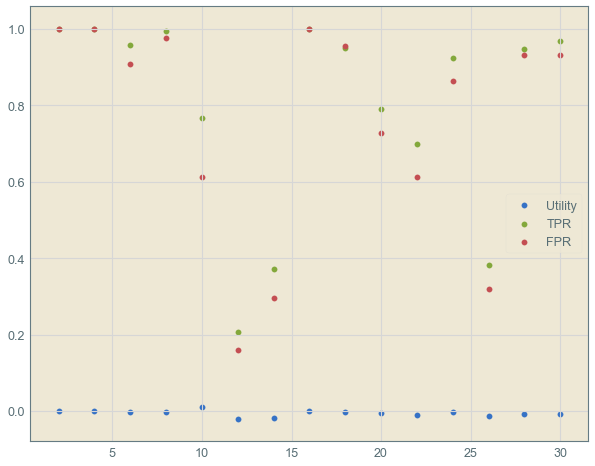

In [46]:
result['utility'] = result['model_return'] - result['raw_return']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=result.index, y=result['utility'], label='Utility')
ax.scatter(x=result.index, y=result['tpr'], label='TPR')
ax.scatter(x=result.index, y=result['fpr'], label='FPR')
ax.legend()
plt.show()

In [50]:
result_multi_layer = {}
for i in range(5,45,5):
    print("Nodes per Layer: " + str(i))
    ut = neural_net(layers=(i-4,i,i-4), rand=2, test_size=800, output='hide')
    result_multi_layer[i] = [ut.get(key) for key in ['tpr','fpr','utility','model_invested','model_return','raw_return']]

Nodes per Layer: 5
Nodes per Layer: 10
Nodes per Layer: 15


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes per Layer: 20
Nodes per Layer: 25


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Nodes per Layer: 30
Nodes per Layer: 35
Nodes per Layer: 40


C:\Users\isaac\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [51]:
result_layers = None
try:
    result_layers
except NameError:
    result_layers = None
if result_layers is None:
    result_layers = pd.DataFrame(result_multi_layer).T
    result_layers.columns = ['tpr','fpr','utility','model_invested','model_return','raw_return']
else:
    result_layer_add = pd.DataFrame(result_multi_layer).T
    result_layer_add.columns = ['tpr','fpr','utility','model_invested','model_return','raw_return']
    result_layers_mg = pd.concat([result_layers, result_layer_add], axis=0, sort=False)


In [52]:
result_layers.drop(columns=[0,1,2,3,4], inplace=True, errors='ignore')
result_layers.dropna(inplace=True)

In [53]:
result_layers # = result_layers.iloc[:,[4,0,5,1,2,3]]

,tpr,fpr,utility,model_invested,model_return,raw_return
5,1.000000,1.000000,0.000000,8546250.0,0.108661,0.108661
10,1.000000,1.000000,0.000000,8546250.0,0.108661,0.108661
15,0.995739,1.000000,-0.004878,8516250.0,0.108131,0.108661
20,0.984375,0.989583,-0.016951,8379500.0,0.106820,0.108661
25,0.301136,0.270833,-0.062946,2482575.0,0.101822,0.108661
30,0.981534,0.937500,-0.028733,8327050.0,0.105539,0.108661
35,1.000000,1.000000,0.000000,8546250.0,0.108661,0.108661
40,0.977273,0.927083,-0.025488,8306850.0,0.105892,0.108661


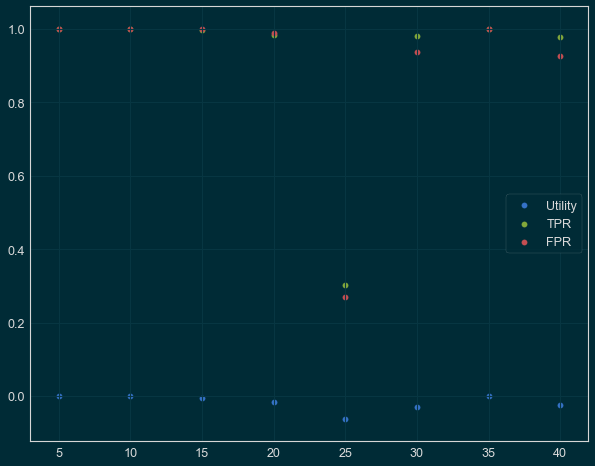

In [59]:
jtplot.style(theme='solarizedd')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=result_layers.index, y=result_layers['utility'], label='Utility')
ax.scatter(x=result_layers.index, y=result_layers['tpr'], label='TPR')
ax.scatter(x=result_layers.index, y=result_layers['fpr'], label='FPR')
ax.legend()
plt.show()